### Load The Keras dataset 

In [1]:
from keras.datasets.mnist import load_data

# load the data - it returns 2 tuples of digits & labels - one for
# the train set & the other for the test set
(train_digits, train_labels), (test_digits, test_labels) = load_data()

Using TensorFlow backend.


In [2]:
# display 14 random images from the training set
import numpy as np
import matplotlib.pyplot as plt
# to fix the randomization
np.random.seed(123)
#random generation of integer values
rand_14 = np.random.randint(0, train_digits.shape[0],14)
sample_digits = train_digits[rand_14]
sample_labels = train_labels[rand_14]
sample_labels

array([4, 9, 0, 4, 6, 3, 8, 5, 3, 6, 8, 7, 7, 9], dtype=uint8)

In [3]:
sample_digits

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [42]:
sample_digits.shape

(14, 28, 28)

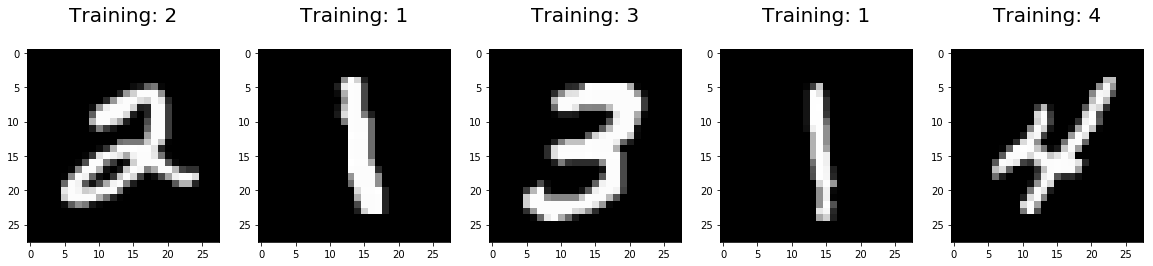

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_digits[5:10], train_labels[5:10])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap='Greys') # cmap = color map 
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
train_digits.shape

(60000, 28, 28)

In [6]:
# some variables...
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1  # we have grayscale images
# NOTE: image_height == image_width == 28

# re-shape the images data - Preprocessing
train_data = np.reshape(train_digits, (train_digits.shape[0], 
                                       image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],
                                     image_height, image_width, num_channels))

In [40]:
train_data.shape

(60000, 28, 28, 1)

In [7]:
a = np.zeros((10,2))
a.shape
b = np.reshape(a,(4,5))
b

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
# re-scale the image data to values between (0.0,1.0]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

In [9]:
# one-hot encode the labels - we have 10 output classes
# so 3 -> [0 0 0 1 0 0 0 0 0 0], 5 -> [0 0 0 0 0 1 0 0 0 0] & so on
[3,5,7]
'''[[0 0 0 1 0 0 0 0 0 0]
    [0 0 0 0 0 1 0 0 0 0]  
    [0 0 0 0 0 0 0 1 0 0]]''' 

from keras.utils import to_categorical
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
train_labels_cat.shape, test_labels_cat.shape

((60000, 10), (10000, 10))

In [10]:
# shuffle the training dataset (5 times!)
for _ in range(5): 
    indexes = np.random.permutation(len(train_data))

train_data = train_data[indexes]
train_labels_cat = train_labels_cat[indexes]
# now set-aside 10% of the train_data/labels as the
# cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_data))

# first pick validation set from train_data/labels
val_data = train_data[:val_count,:]
val_labels_cat = train_labels_cat[:val_count,:]

# leave rest in training set
train_data2 = train_data[val_count:,:]
train_labels_cat2 = train_labels_cat[val_count:,:]

# NOTE: We will train on train_data2/train_labels_cat2 and 
# cross-validate on val_data/val_labels_cat

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
def build_model():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
                     padding='same',
                     input_shape=(image_height, image_width, num_channels)))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', 
                     padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', 
                     padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    
    model.add(Flatten())
    
    ## Neural Network to Train with Image data
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    ## ylog(p) + (1-y) log (1-p) where p is predicted observation of class c
    model.compile(optimizer='adam', loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flat

In [12]:
# Define the Keras TensorBoard callback.
logdir="E:/MachineLearning/tensor/"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [13]:
results = model.fit(train_data2, train_labels_cat2, 
                    epochs=15, batch_size=64,
                    validation_data=(val_data, val_labels_cat), 
                    callbacks=[tensorboard_callback])

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 68s 1ms/step - loss: 0.1752 - acc: 0.9453 - val_loss: 0.0643 - val_acc: 0.9800
Epoch 2/15
54000/54000 [==============================] - 65s 1ms/step - loss: 0.0478 - acc: 0.9847 - val_loss: 0.0417 - val_acc: 0.9868
Epoch 3/15
54000/54000 [==============================] - 66s 1ms/step - loss: 0.0337 - acc: 0.9890 - val_loss: 0.0363 - val_acc: 0.9878
Epoch 4/15
54000/54000 [==============================] - 67s 1ms/step - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0369 - val_acc: 0.9887
Epoch 5/15
54000/54000 [==============================] - 66s 1ms/step - loss: 0.0227 - acc: 0.9925 - val_loss: 0.0274 - val_acc: 0.9908
Epoch 6/15
54000/54000 [==============================] - 66s 1ms/step - loss: 0.0179 - acc: 0.9942 - val_loss: 0.0272 - val_acc: 0.9905
Epoch 7/15
54000/54000 [==============================] - 65s 1ms/step - loss: 0.

In [14]:
# display plots...
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.show(results.history)

In [15]:
test_loss, test_accuracy = \
  model.evaluate(test_data, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

10000/10000 [==============================] - 5s 540us/step
Test loss: 0.0340 accuracy: 0.9910


In [16]:
predictions = model.predict(test_data)
first20_preds = np.argmax(predictions, axis=1)[:25]
first20_true = np.argmax(test_labels_cat,axis=1)[:25]
print(first20_preds)
print(first20_true)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


In [44]:
test_data.shape

(10000, 28, 28, 1)

In [25]:
# how many mismatches?
(np.argmax(predictions, axis=1) != np.argmax(test_labels_cat,axis=1)).sum()

61

In [105]:
import cv2
img = cv2.imread('E:/Opencv/image2.png',0)

In [106]:
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)

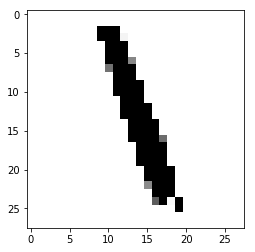

In [107]:
plt.imshow(img.reshape(28, 28),cmap='Greys')

In [108]:
pred = model.predict(img.reshape(1, 28, 28, 1))

In [109]:
np.argmax(pred, axis=1)

array([1], dtype=int64)